<a href="https://colab.research.google.com/github/gabrielcampanile/Neural-Network/blob/main/Projeto%200%20-%20Perceptron/Projeto0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

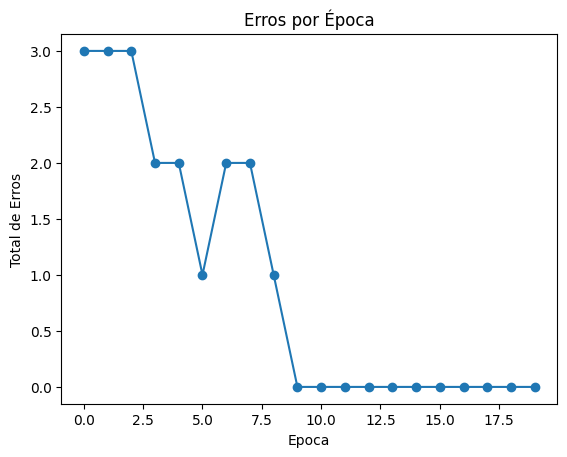

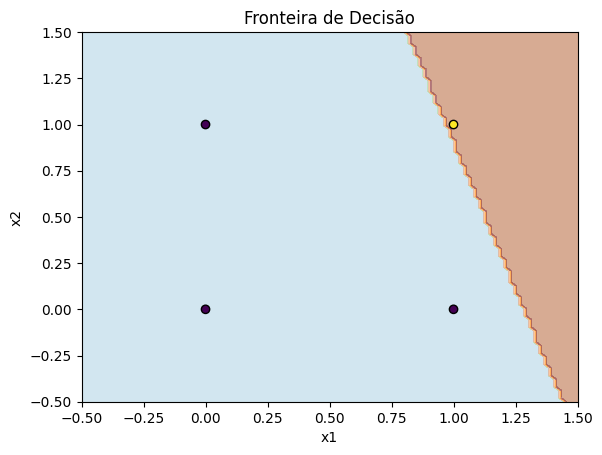

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Dados para porta AND
# Para porta OR, basta trocar os valores de 'y'
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([0, 0, 0, 1])  # Porta AND
# y = np.array([0, 1, 1, 1])  # Porta OR (descomente se quiser testar OR)

# Inicializar pesos e bias aleatoriamente
np.random.seed(42)
pesos = np.random.randn(2)
bias = np.random.randn()

# Hiperparâmetros
taxa_aprendizado = 0.1
n_epocas = 20

# Para guardar erros em cada época
erros_por_epoca = []

# Função de ativação (degrau)
def step_function(z):
    return 1 if z >= 0 else 0

# Treinamento
def treinar():
    global pesos, bias
    for epoca in range(n_epocas):
        erro_total = 0
        for xi, target in zip(X, y):
            z = np.dot(xi, pesos) + bias
            saida = step_function(z)
            erro = target - saida

            # Atualizar pesos e bias
            pesos += taxa_aprendizado * erro * xi
            bias += taxa_aprendizado * erro

            erro_total += abs(erro)
        erros_por_epoca.append(erro_total)

# Função para plotar fronteira de decisão
def plotar_fronteira():
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    Z = np.array([step_function(np.dot(np.array([x, y]), pesos) + bias) for x, y in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title('Fronteira de Decisão')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

# Função para plotar erros
def plotar_erros():
    plt.plot(range(n_epocas), erros_por_epoca, marker='o')
    plt.title('Erros por Época')
    plt.xlabel('Epoca')
    plt.ylabel('Total de Erros')
    plt.show()

# Executar treinamento e plotagens
treinar()
plotar_erros()
plotar_fronteira()
